### Objective: Make an exploratory data analysis of the provided dataset: how many classes, how many examples per class, word distribution (e.g. TF-IDF), etc. You should document your analysis with proper visualizations.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_json('./data/data.jsonl', lines=True)


data.head()


,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


## Data Cleaning

In [46]:
print(data.isnull().sum()) #! no missing values were found


print("Number of duplicate rows:", data.duplicated().sum())
print("Number of duplicate texts:", data['text'].duplicated().sum())
# data.drop_duplicates(inplace=True)

text     0
label    0
dtype: int64
Number of duplicate rows: 686
Number of duplicate texts: 22987


## Re-labeling

In [12]:
emotions_to_int = {
    'sadness': 0,
    'joy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'surprise': 5
}

int_to_emotions = {v: k for k, v in emotions_to_int.items()}

emotions_count =  data['label'].explode().value_counts()
# replace the int values with the emotions

emotions_count.index = emotions_count.index.map(int_to_emotions)
emotions_count



label
joy         140779
sadness     120989
anger        57235
fear         47664
love         34497
surprise     14959
Name: count, dtype: int64

## Amount of entries per class

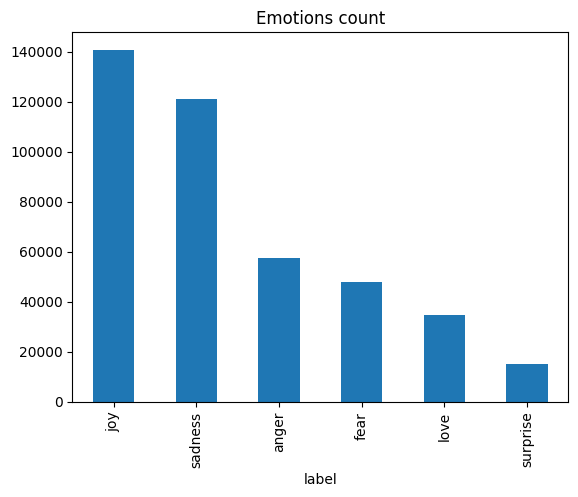

In [13]:
# plot the emotions count
emotions_count.plot(kind='bar', title='Emotions count')
plt.show()

We see that there's a relatively severe class imbalance. We have to take this into account when training our model if the imbalance is present in the training set.

## Word distribution

sadness


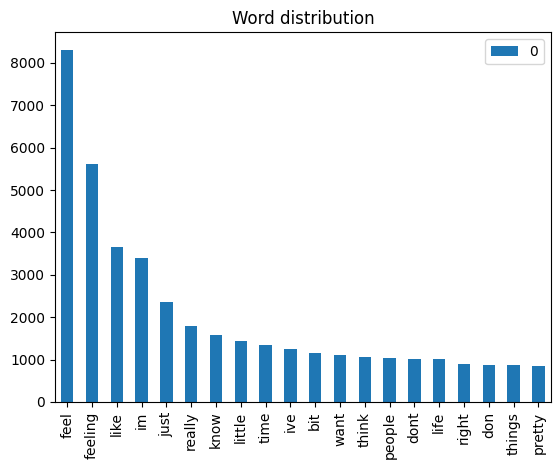

joy


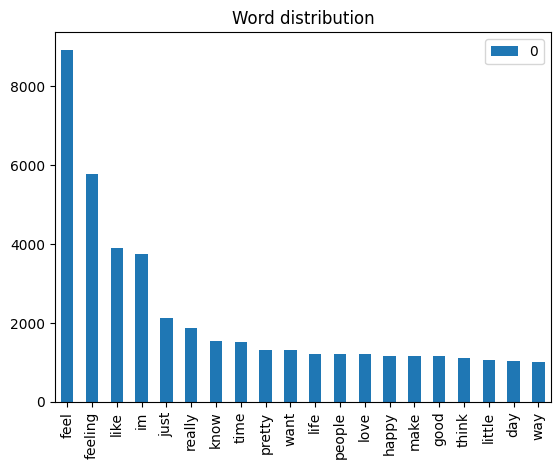

love


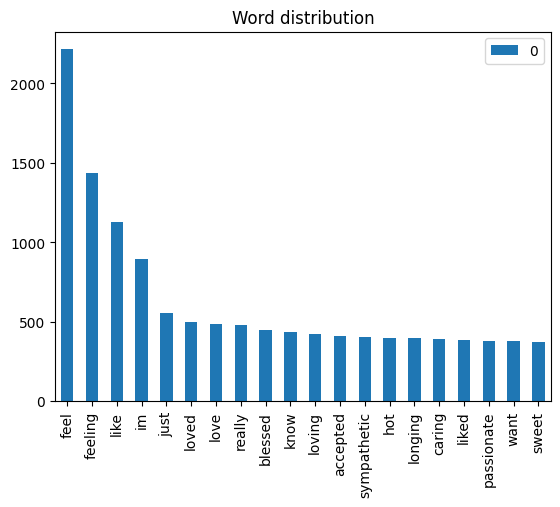

anger


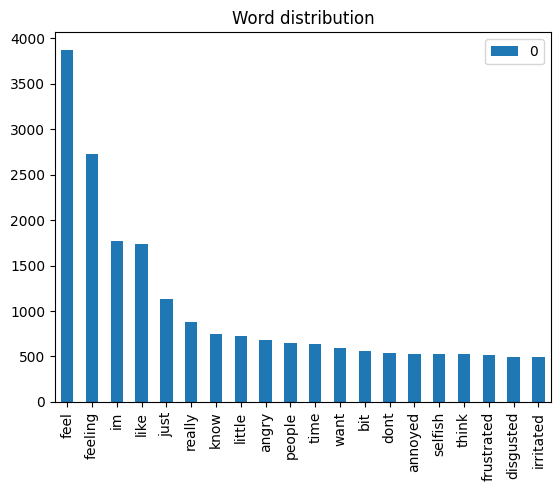

fear


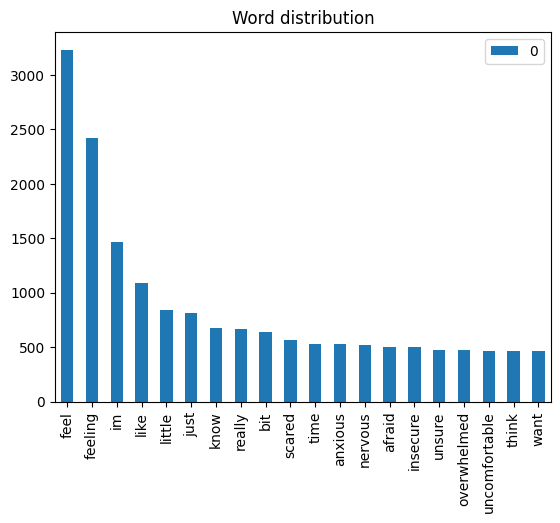

surprise


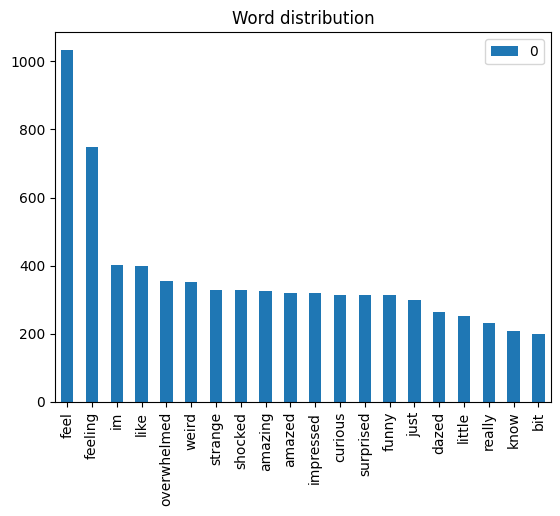

In [14]:
# plot the word distribution
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

vectorizer = TfidfVectorizer(stop_words='english')

def plot_word_distribution(data, vectorizer):
    X = vectorizer.fit_transform(data['text'])
    words = vectorizer.get_feature_names_out()
    word_freq = X.sum(axis=0)
    word_freq = pd.DataFrame(word_freq, columns=words)
    word_freq = word_freq.T
    word_freq = word_freq.sort_values(by=0, ascending=False)
    word_freq = word_freq.head(20)
    word_freq.plot(kind='bar', title='Word distribution')
    plt.show()

# plot_word_distribution(data, vectorizer)

for emotion_int, emotion_name in int_to_emotions.items():
    print(emotion_name)
    plot_word_distribution(data[data['label'] == emotion_int], vectorizer)
    

## Word Cloud per emotion

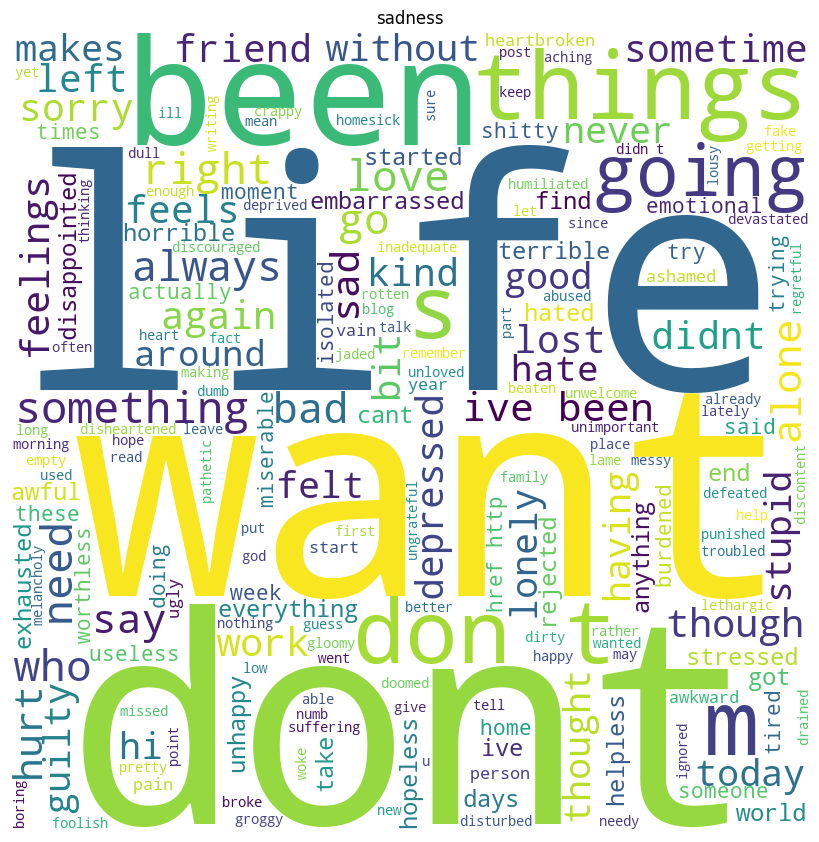

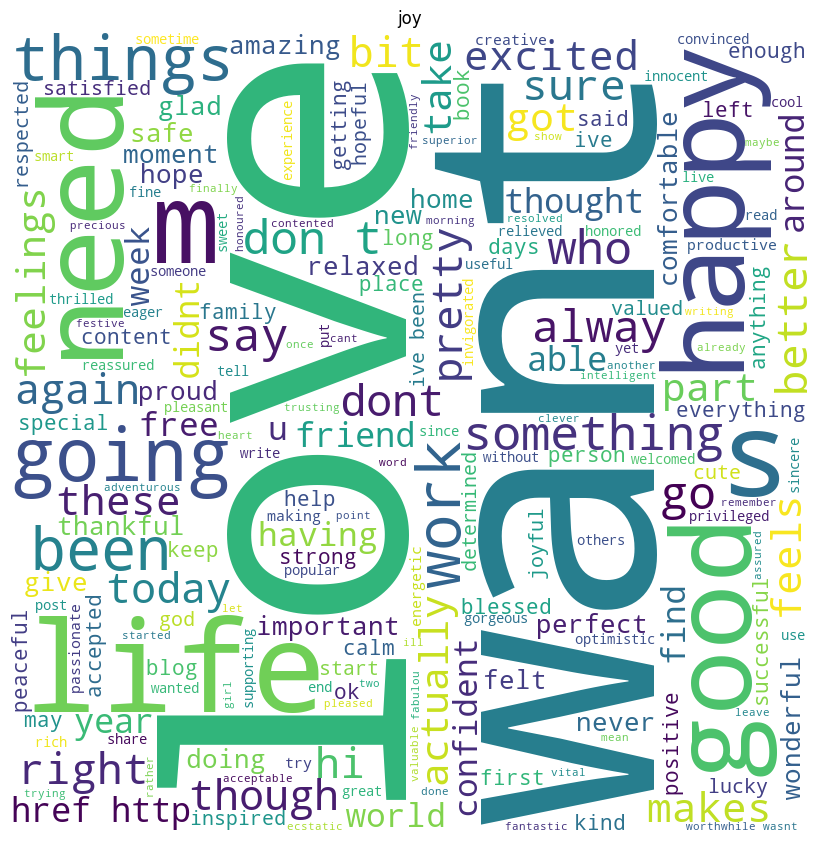

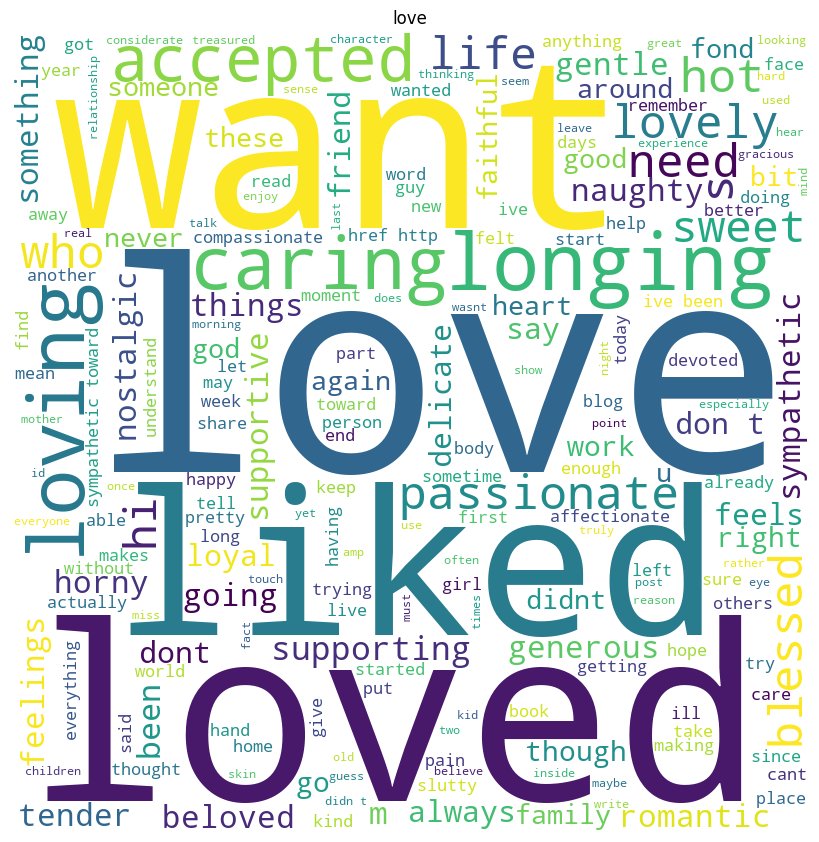

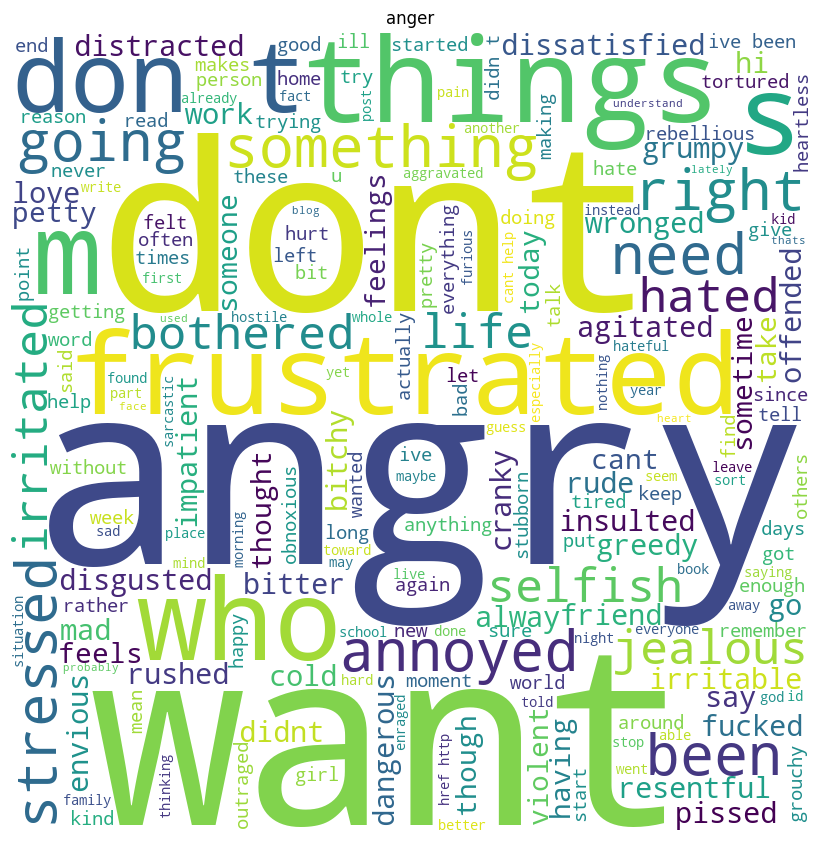

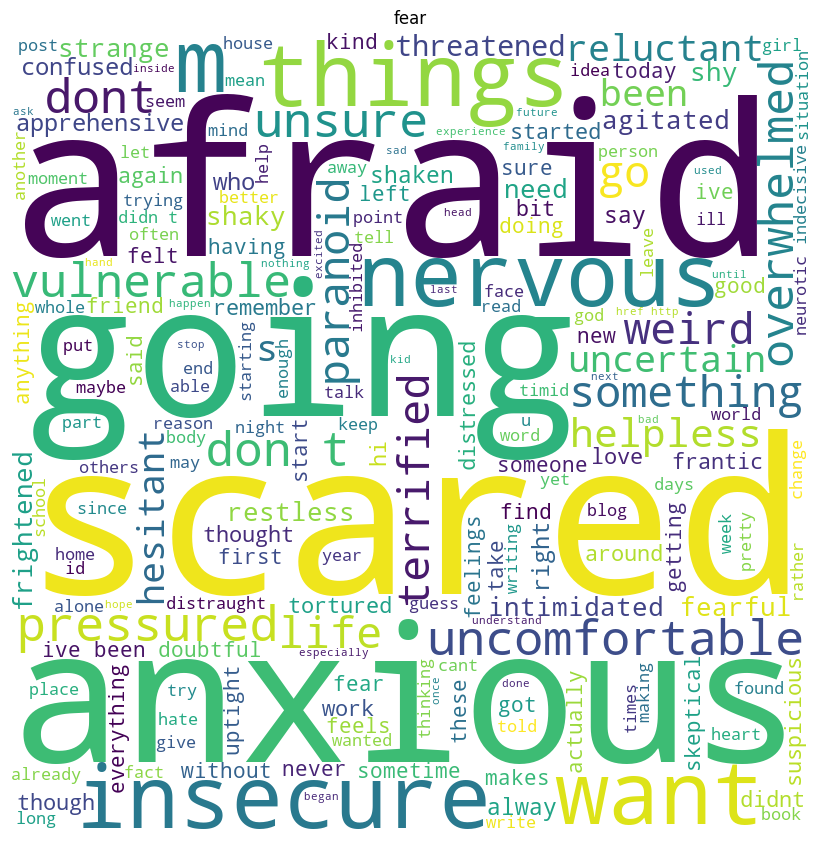

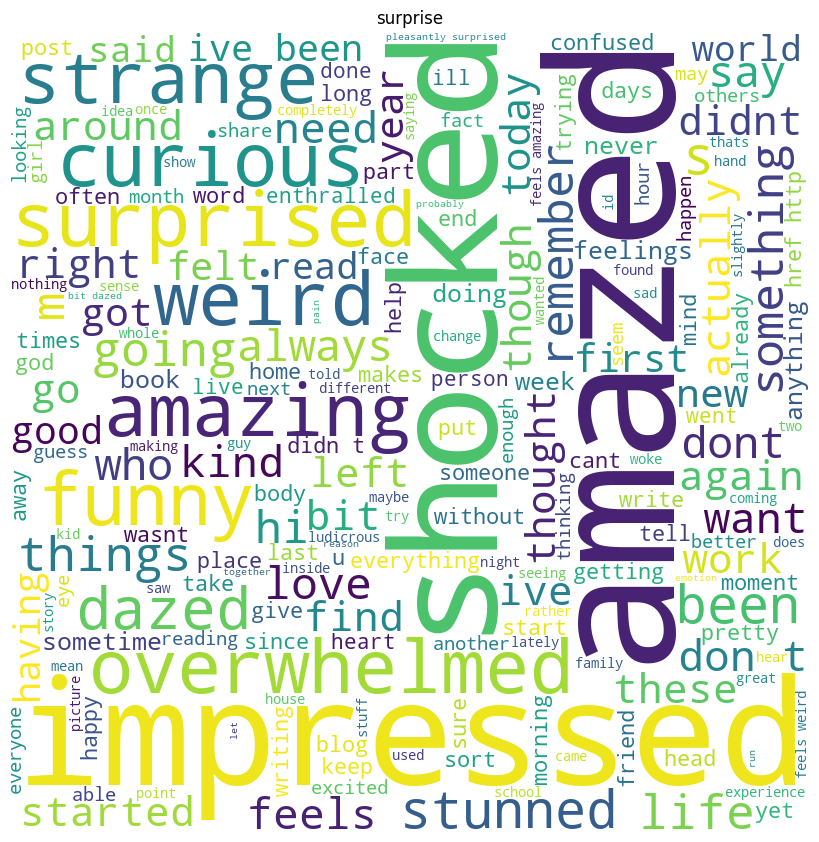

In [15]:

from wordcloud import WordCloud

def generate_wordclouds(data, int_to_emotions):

    for emotion_int, emotion_name in int_to_emotions.items():
        emotion_texts = data[data['label'] == emotion_int]['text']

        wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = {'people', 'thing', 'think', 'had', 'day', 'i', 'a', 'im', 'myself', 'he', 'she', 'to', 'of', 'and', 'the', 'in', 'is', 'for', 'it', 'on', 'that', 'with', 'are', 'you', 'be', 'this', 'as', 'at', 'or', 'not', 'have', 'was', 'from', 'by', 'but', 'an', 'they', 'will', 'has', 'my', 'about', 'so', 'all', 'just', 'what', 'like', 'your', 'me', 'more', 'up', 'out', 'if', 'no', 'one', 'get', 'how', 'can', 'we', 'do', 'time', 'when', 'its', 'there', 'would', 'which', 'their', 'some', 'were', 'other', 'then', 'them', 'know', 'only', 'could', 'see', 'him', 'her', 'than', 'now', 'look', 'come', 'did', 'back', 'after', 'our', 'well', 'also', 'even', 'should', 'into', 'over', 'where', 'down', 'most', 'made', 'those', 'because', 'off', 'am', 'too', 'here', 'ever', 'being', 'way', 'make', 'much', 'many', 'still', 'before', 'same', 'might', 'such', 'under', 'every', 'own', 'why', 'between', 'both', 'under', 'against', 'each', 'few', 'through', 'while', 'own', 'same', 'where', 'after', 'before', 'about', 'over', 'under', 'above', 'below', 'more', 'less', 'few', 'many', 'much', 'some', 'any', 'no', 'yes', 'not', 'only', 'so', 'very', 'too', 'just', 'quite', 'really', 'almost', 'nearly', 'well', 'much', 'little', 'more', 'less', 'few', 'lot', 'fewer', 'most', 'least', 'feel', 'feeling'}
                ).generate(' '.join(emotion_texts))
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(emotion_name)

        plt.show()

generate_wordclouds(data, int_to_emotions)

In [48]:
from scipy import stats

lens = [len(c.split()) for c in data['text']]
print(np.min(lens), np.max(lens), np.mean(lens), np.std(lens), stats.mode(lens))

1 178 19.211015117235952 11.051035905061488 ModeResult(mode=12, count=17017)


In [49]:
# print(data['text'][0])
# print the longest text
print(data['text'][np.argmax(lens)])
# print(data['text'][np.argmax(lens)])
print(len(data['text'][np.argmax(lens)].split()))

a few days back i was waiting for the bus at the bus stop before getting into the bus i had prepared the exact amount of coins to pay for the bus fair and when i got into the bus i put these coins into the box meant to collect the bus fair i thought that i had paid and wanted to get inside however the bus driver called me and asked me in an impolite way if the coins were stuck at the opening of the box he had not seen me paying and there wasnt a stack of coins in the box i could not understand this and the driver kept questioning me he made me feel angry and at last i inserted a dollar coin in the box just to get away from him later i found that i had forgotten a few coins in my pocket and had not paid enough for the fair the first time after i had entered the bus i could still hear him scolding me and i felt disgusted
178


In [50]:
count_dict = {i: 0 for i in range(1, 179)}
for l in lens:
    count_dict[l] += 1

print(count_dict)

{1: 26, 2: 79, 3: 1124, 4: 7623, 5: 12598, 6: 14882, 7: 15916, 8: 15821, 9: 16361, 10: 16465, 11: 16872, 12: 17017, 13: 16717, 14: 16411, 15: 16302, 16: 15879, 17: 15075, 18: 14768, 19: 13881, 20: 13557, 21: 12680, 22: 12091, 23: 11187, 24: 10529, 25: 9901, 26: 9391, 27: 8386, 28: 7894, 29: 7212, 30: 6611, 31: 5972, 32: 5448, 33: 5138, 34: 4562, 35: 4219, 36: 3880, 37: 3476, 38: 3141, 39: 2866, 40: 2699, 41: 2426, 42: 2202, 43: 1939, 44: 1848, 45: 1690, 46: 1493, 47: 1358, 48: 1195, 49: 1126, 50: 1011, 51: 918, 52: 866, 53: 737, 54: 670, 55: 592, 56: 477, 57: 404, 58: 310, 59: 232, 60: 202, 61: 140, 62: 91, 63: 80, 64: 45, 65: 29, 66: 22, 67: 11, 68: 9, 69: 9, 70: 2, 71: 1, 72: 1, 73: 1, 74: 3, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 2, 101: 1, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 1, 111: 0, 112: 0, 113: 0, 114: 0, 1

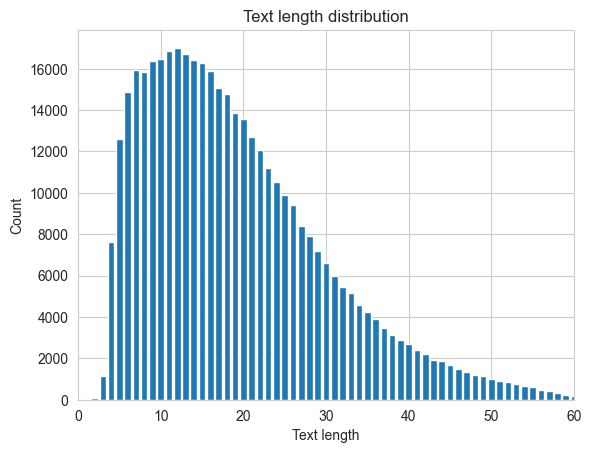

In [51]:
# plot using the count dictionary
plt.bar(count_dict.keys(), count_dict.values())
plt.xlim(0, 60)
plt.title('Text length distribution')
plt.xlabel('Text length')
plt.ylabel('Count')
plt.show()

## Analyzing duplicates

In [53]:

duplicates = data[data['text'].duplicated(keep=False)]
duplicates = duplicates.sort_values('text')

true_duplicates = duplicates[duplicates['label'].duplicated(keep=False)]
# order by which text appears the most
true_duplicates = duplicates.groupby(['text', 'label']).size().sort_values(ascending=False).reset_index(name='count')
print(true_duplicates.head())


# gather the pairs of labels that appear the most in the duplicates ['label'] column
label_pairs = duplicates.groupby(['text'])['label'].apply(list).value_counts()
print(label_pairs)

                                                text  label  count
0      i feel more adventurous willing to take risks      1     16
1  i feel more adventurous willing to take risks ...      1     15
2  i feel jubilation over how i met your mother e...      1      8
3                               i feel delicious day      1      7
4                                        i feel fine      1      6
label
[1, 2]                                              5102
[2, 1]                                              5012
[5, 4]                                              1882
[4, 5]                                              1843
[3, 0]                                              1369
[0, 3]                                              1318
[3, 4]                                              1117
[4, 3]                                              1089
[0, 4]                                              1074
[4, 0]                                              1056
[1, 5]                